In [ ]:
import pandas as pd
import os
import sys
from datetime import datetime
from dateutil import tz
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
import AOD_data
import importlib
import numpy as np
from sklearn import linear_model
importlib.reload(AOD_data)

<module 'AOD_data' from '/mnt/HDD2/Cgeo/git/contaminantes_satelites/src/AOD_data.py'>

In [ ]:
AOD_dat = AOD_data.load_AOD_data('../data_s/red_estaciones_todos_2018.csv')
PM25_dat = AOD_data.load_PM25('../data_s/PM2.5/PM2_5_2004-2021.csv',
                     initial_interval='2018-01-01',
                     end_interval='2019-01-01')
AOD_PM25_all_2018 = AOD_data.merge_AOD_PM25(AOD_dat, PM25_dat)
AOD_PM25_all_2018.head()

Converting to local time:  America/Mexico_City


,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion,TIME_STAMP,Local_time,Local_time_hour,Local_time_date,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD,FECHA_date
38,419.0,131.0,18,2018-01-03T18:00:00,NEZ,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,NEZ_ZMVM,2018-01-03,12.0,pm2.5,57.0,µg/m<sup>3</sup>,2018-01-03
40,442.0,180.0,18,2018-01-03T18:00:00,SAG,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,SAG_ZMVM,2018-01-03,12.0,pm2.5,39.0,µg/m<sup>3</sup>,2018-01-03
49,647.0,222.0,19,2018-01-03T19:25:00,NEZ,2018-01-03 19:25:00,2018-01-03 13:25:00-06:00,13,2018-01-03,NEZ_ZMVM,2018-01-03,13.0,pm2.5,29.0,µg/m<sup>3</sup>,2018-01-03
56,674.0,1181.0,20,2018-01-04T20:10:00,NEZ,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,NEZ_ZMVM,2018-01-04,14.0,pm2.5,33.0,µg/m<sup>3</sup>,2018-01-04
58,538.0,2060.0,20,2018-01-04T20:10:00,SAG,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,SAG_ZMVM,2018-01-04,14.0,pm2.5,41.0,µg/m<sup>3</sup>,2018-01-04


In [ ]:
temp_2018_01_02 = pd.read_csv('../data_s/red_est_ERA5_LAND_HOURLY_2018_01_to_02.csv')
temp_2018_03_04 = pd.read_csv('../data_s/red_est_ERA5_LAND_HOURLY_2018_03_to_04.csv')
temp_2018_05_06 = pd.read_csv('../data_s/red_est_ERA5_LAND_HOURLY_2018_05_to_06.csv')
temp_2018_07_08 = pd.read_csv('../data_s/red_est_ERA5_LAND_HOURLY_2018_07_to_08.csv')
temp_2018_09_10 = pd.read_csv('../data_s/red_est_ERA5_LAND_HOURLY_2018_09_to_10.csv')
temp_2018_11_12 = pd.read_csv('../data_s/red_est_ERA5_LAND_HOURLY_2018_11_to_12.csv')
temp_2018= pd.concat([temp_2018_01_02,
                      temp_2018_03_04,
                      temp_2018_05_06,
                      temp_2018_07_08,
                      temp_2018_09_10,
                      temp_2018_11_12,
                     ])
temp_2018.head()

,id,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,timestamp
0,AJU,285.002533,-0.000869,0.781372,0.862854,0.000005,4.858032,2.128418,0.0,2018-01-01T01:00:00
1,AJM,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00
2,DIC,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00
3,EAJ,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00
4,CCA,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00


In [ ]:
temp_2018['Estacion']= temp_2018['id']
temp_2018['TIME_STAMP'] = pd.to_datetime(temp_2018['timestamp']) ### 
### Change time zone 
local_time = 'America/Mexico_City'
print('Converting to local time: ', local_time)
temp_2018['Local_time']= temp_2018['TIME_STAMP'].dt.tz_localize('UTC').dt.tz_convert(local_time)
#tz_localize('utc').tz_convert('America/Mexico_City')
temp_2018['Local_time'+'_hour'] = temp_2018['Local_time'].apply(lambda l: l.hour)
temp_2018['Local_time'+'_date'] = temp_2018['Local_time'].apply(lambda l: l.date)
temp_2018.head()

Converting to local time:  America/Mexico_City


,id,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,timestamp,Estacion,TIME_STAMP,Local_time,Local_time_hour,Local_time_date
0,AJU,285.002533,-0.000869,0.781372,0.862854,0.000005,4.858032,2.128418,0.0,2018-01-01T01:00:00,AJU,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
1,AJM,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00,AJM,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
2,DIC,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00,DIC,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
3,EAJ,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00,EAJ,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
4,CCA,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.0,2018-01-01T01:00:00,CCA,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31


In [ ]:
temp_PM25_esta =  AOD_PM25_all_2018.merge(temp_2018,
                                  how= 'left',
                                  right_on = ['Estacion','Local_time_hour' , 'Local_time_date' ],
                                  left_on=['Estacion','Local_time_hour' ,'Local_time_date' ]
                                 )
temp_PM25_esta=  temp_PM25_esta[temp_PM25_esta['VALOR'].isna()==False]

In [ ]:
temp_PM25_esta

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp_x,Estacion,TIME_STAMP_x,Local_time_x,Local_time_hour,Local_time_date,CVE_EST,...,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,timestamp_y,TIME_STAMP_y,Local_time_y
0,419.0,131.0,18,2018-01-03T18:00:00,NEZ,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,NEZ_ZMVM,...,-0.000174,0.586761,-1.299316,0.000002,0.0000,1.156128,0.0,2018-01-03T18:00:00,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00
1,442.0,180.0,18,2018-01-03T18:00:00,SAG,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,SAG_ZMVM,...,-0.000183,0.493988,-1.350098,0.000001,0.0000,1.130493,0.0,2018-01-03T18:00:00,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00
2,647.0,222.0,19,2018-01-03T19:25:00,NEZ,2018-01-03 19:25:00,2018-01-03 13:25:00-06:00,13,2018-01-03,NEZ_ZMVM,...,-0.000358,0.820496,-1.947619,0.000002,0.0000,1.156128,0.0,2018-01-03T19:00:00,2018-01-03 19:00:00,2018-01-03 13:00:00-06:00
3,674.0,1181.0,20,2018-01-04T20:10:00,NEZ,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,NEZ_ZMVM,...,-0.000606,1.160187,-1.360596,0.000002,0.0000,1.151733,0.0,2018-01-04T20:00:00,2018-01-04 20:00:00,2018-01-04 14:00:00-06:00
4,538.0,2060.0,20,2018-01-04T20:10:00,SAG,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,SAG_ZMVM,...,-0.000540,1.050812,-1.779541,0.000002,0.0000,1.126709,0.0,2018-01-04T20:00:00,2018-01-04 20:00:00,2018-01-04 14:00:00-06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,116.0,112.0,20,2018-12-30T20:55:00,MER,2018-12-30 20:55:00,2018-12-30 14:55:00-06:00,14,2018-12-30,MER_ZMVM,...,-0.000877,0.664915,3.336609,0.000006,0.0000,0.586304,0.0,2018-12-30T20:00:00,2018-12-30 20:00:00,2018-12-30 14:00:00-06:00
468,139.0,197.0,20,2018-12-30T20:55:00,SAG,2018-12-30 20:55:00,2018-12-30 14:55:00-06:00,14,2018-12-30,SAG_ZMVM,...,-0.000886,0.912962,3.354187,0.000010,0.0000,1.145752,0.0,2018-12-30T20:00:00,2018-12-30 20:00:00,2018-12-30 14:00:00-06:00
469,190.0,161.0,20,2018-12-30T20:55:00,TLA,2018-12-30 20:55:00,2018-12-30 14:55:00-06:00,14,2018-12-30,TLA_ZMVM,...,-0.000900,0.352415,3.558289,0.000007,4.4375,0.654907,0.0,2018-12-30T20:00:00,2018-12-30 20:00:00,2018-12-30 14:00:00-06:00
470,302.0,763.0,20,2018-12-31T20:05:00,MER,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31,MER_ZMVM,...,-0.000773,0.052902,1.616943,0.000003,0.0000,0.585449,0.0,2018-12-31T20:00:00,2018-12-31 20:00:00,2018-12-31 14:00:00-06:00


Podemos utilizar los datos y hacer un merge para obtener los datos de AOD junto con los datos de las estaciones. Pero no estoy seguro que nos interese hacer tal cosa, si no obtener los promedios y utilizar los valores de dichos promedios para usarlos dentro de un modelo lineal para la obtencion de PM 2.5 .  

<AxesSubplot: >

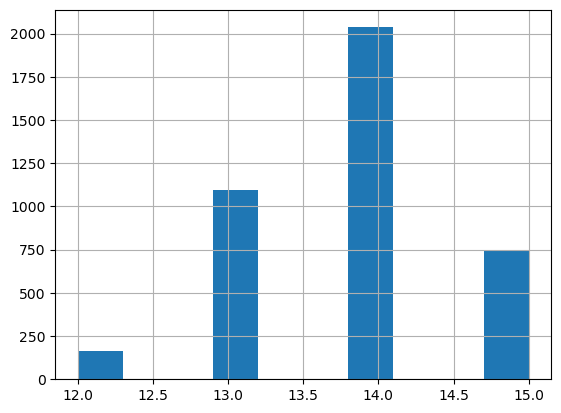

In [ ]:
AOD_dat['Local_time_hour'].hist()

In [ ]:

AOD_dat['Mes'] = AOD_dat['Local_time'].apply(lambda l: l.month)
AOD_dat.head()

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion,TIME_STAMP,Local_time,Local_time_hour,Local_time_date,Mes
84,939.0,197.0,19,2018-01-01T19:40:00,DIC,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01,1
86,1171.0,239.0,19,2018-01-01T19:40:00,CCA,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01,1
87,920.0,238.0,19,2018-01-01T19:40:00,UAX,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01,1
89,680.0,454.0,19,2018-01-01T19:40:00,UIZ,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01,1
90,970.0,194.0,19,2018-01-01T19:40:00,MPA,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01,1


Vamos a obtener los datos promedios de pm25 para estos horas 


In [ ]:
PM25_dat['Mes']=PM25_dat['FECHA_date'].apply(lambda l: l.month)

In [ ]:
horas_get= AOD_dat['Local_time_hour'].unique()
PM25_dat_h = PM25_dat[PM25_dat['HORA'].apply(lambda l: l in horas_get)]

In [ ]:
horas_get

array([13, 12, 14, 15])

In [ ]:

PM25_month_hour=  PM25_dat_h.groupby( ['Mes','HORA', 'Estacion']).mean()
PM25_month_hour.head()

VALOR
Mes HORA Estacion           
1   12   AJM        1.000000
         AJU        1.000000
         CAM       50.090909
         HGM        1.000000
         INN        1.000000

In [ ]:
PM25_month_hour= PM25_month_hour.reset_index()

In [ ]:
AOD_dat_month_hour=  AOD_dat.groupby( ['Mes','Local_time_hour', 'Estacion']).mean()
AOD_dat_month_hour.head()

Optical_Depth_047  AOD_Uncertainty  hour_day
Mes Local_time_hour Estacion                                              
1   12              CHO                   439.0            138.0      18.0
                    COR                   344.0             79.0      18.0
                    FAR                   420.0            126.0      18.0
                    IZT                   493.0            106.0      18.0
                    LLA                   383.0            159.0      18.0

In [ ]:
temp_2018

,id,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,timestamp,Estacion,TIME_STAMP,Local_time,Local_time_hour,Local_time_date
0,AJU,285.002533,-0.000869,0.781372,0.862854,0.000005,4.858032,2.128418,0.000000,2018-01-01T01:00:00,AJU,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
1,AJM,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.000000,2018-01-01T01:00:00,AJM,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
2,DIC,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.000000,2018-01-01T01:00:00,DIC,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
3,EAJ,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.000000,2018-01-01T01:00:00,EAJ,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
4,CCA,288.656830,-0.000988,0.602661,0.233948,0.000005,0.843750,1.616577,0.000000,2018-01-01T01:00:00,CCA,2018-01-01 01:00:00,2017-12-31 19:00:00-06:00,19,2017-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60019,LPR,NaN,-0.001372,1.641769,0.511360,0.000033,3.588623,0.660522,0.000001,2019-01-01T00:00:00,LPR,2019-01-01 00:00:00,2018-12-31 18:00:00-06:00,18,2018-12-31
60020,TLA,NaN,-0.001569,0.701340,0.454720,0.000063,4.437500,0.653687,0.000002,2019-01-01T00:00:00,TLA,2019-01-01 00:00:00,2018-12-31 18:00:00-06:00,18,2018-12-31
60021,FAC,NaN,-0.001569,0.701340,0.454720,0.000063,4.437500,0.653687,0.000002,2019-01-01T00:00:00,FAC,2019-01-01 00:00:00,2018-12-31 18:00:00-06:00,18,2018-12-31
60022,ATI,NaN,-0.001575,0.088058,-0.027702,0.000076,4.599121,1.161621,0.000004,2019-01-01T00:00:00,ATI,2019-01-01 00:00:00,2018-12-31 18:00:00-06:00,18,2018-12-31


In [ ]:
AOD_dat_month_hour = AOD_dat_month_hour.reset_index()

In [ ]:
temp_2018['Mes_local']=temp_2018['Local_time'].apply(lambda l: l.month)

In [ ]:
horas_get= AOD_dat['Local_time_hour'].unique()
temp_2018_h = temp_2018[temp_2018['Local_time_hour'].apply(lambda l: l in horas_get)]
temp_month_hour=  temp_2018_h.groupby( ['Mes_local','Local_time_hour', 'Estacion']).mean()
temp_month_hour.head()

temperature_2m  total_evaporation  \
Mes_local Local_time_hour Estacion                                      
1         12              ACO           287.714420          -0.000256   
                          AJM           287.068818          -0.000268   
                          AJU           284.721728          -0.000310   
                          ATI           286.572157          -0.000261   
                          BJU           287.884846          -0.000256   

                                    u_component_of_wind_10m  \
Mes_local Local_time_hour Estacion                            
1         12              ACO                      0.082893   
                          AJM                     -0.225591   
                          AJU                     -0.165627   
                          ATI                     -0.779506   
                          BJU                     -0.327846   

                                    v_component_of_wind_10m  \
Mes_local Local_time_hour Estacion                            
1         12              ACO                     -0.835243   
                          AJM                     -0.651035   
                          AJU                     -0.278350   
                          ATI                     -0.749825   
                          BJU                     -0.770428   

                                    total_precipitation  \
Mes_local Local_time_hour Estacion                        
1         12              ACO                  0.000218   
                          AJM                  0.000518   
                          AJU                  0.000435   
                          ATI                  0.000594   
                          BJU                  0.000526   

                                    leaf_area_index_high_vegetation  \
Mes_local Local_time_hour Estacion                                    
1         12              ACO                              1.184692   
                          AJM                              0.833898   
                          AJU                              4.842073   
                          ATI                              4.590974   
                          BJU                              0.478000   

                                    leaf_area_index_low_vegetation  \
Mes_local Local_time_hour Estacion                                   
1         12              ACO                             1.027316   
                          AJM                             1.559094   
                          AJU                             2.074506   
                          ATI                             1.146709   
                          BJU                             1.199420   

                                    total_precipitation_hourly  
Mes_local Local_time_hour Estacion                              
1         12              ACO                         0.000011  
                          AJM                         0.000011  
                          AJU                         0.000007  
                          ATI                         0.000023  
                          BJU                         0.000015

In [ ]:
temp_month_hour= temp_month_hour.reset_index()

In [ ]:
temp_month_hour.head()

,Mes_local,Local_time_hour,Estacion,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly
0,1,12,ACO,287.714420,-0.000256,0.082893,-0.835243,0.000218,1.184692,1.027316,0.000011
1,1,12,AJM,287.068818,-0.000268,-0.225591,-0.651035,0.000518,0.833898,1.559094,0.000011
2,1,12,AJU,284.721728,-0.000310,-0.165627,-0.278350,0.000435,4.842073,2.074506,0.000007
3,1,12,ATI,286.572157,-0.000261,-0.779506,-0.749825,0.000594,4.590974,1.146709,0.000023
4,1,12,BJU,287.884846,-0.000256,-0.327846,-0.770428,0.000526,0.478000,1.199420,0.000015


In [ ]:
AOD_dat_month_hour

,Mes,Local_time_hour,Estacion,Optical_Depth_047,AOD_Uncertainty,hour_day
0,1,12,CHO,439.000000,138.000000,18.0
1,1,12,COR,344.000000,79.000000,18.0
2,1,12,FAR,420.000000,126.000000,18.0
3,1,12,IZT,493.000000,106.000000,18.0
4,1,12,LLA,383.000000,159.000000,18.0
...,...,...,...,...,...,...
1063,12,14,TLI,260.700000,917.700000,20.0
1064,12,14,UAX,253.333333,334.777778,20.0
1065,12,14,UIZ,275.000000,710.000000,20.0
1066,12,14,VIF,282.142857,844.785714,20.0


In [ ]:
 AOD_temp_month_hour= AOD_dat_month_hour.merge(
                          temp_month_hour, 
                          how='left',
                          right_on= ['Mes_local','Local_time_hour','Estacion' ], 
                          left_on=['Mes', 'Local_time_hour', 'Estacion'],
                          
                         )

In [ ]:
PM25_month_hour.rename(columns={'VALOR':'PM25'}, inplace= True)

In [ ]:
PM25_month_hour

,Mes,HORA,Estacion,PM25
0,1,12,AJM,1.000000
1,1,12,AJU,1.000000
2,1,12,CAM,50.090909
3,1,12,HGM,1.000000
4,1,12,INN,1.000000
...,...,...,...,...
562,12,15,SFE,1.000000
563,12,15,TLA,32.451613
564,12,15,UAX,1.000000
565,12,15,UIZ,32.400000


In [ ]:
AOD_temp_pm25_month_hour = AOD_temp_month_hour.merge(PM25_month_hour,
                          how='left',
                          right_on= ['Mes','HORA','Estacion' ], 
                          left_on=['Mes', 'Local_time_hour', 'Estacion'],
                         )

In [ ]:
AOD_temp_pm25_month_hour

,Mes,Local_time_hour,Estacion,Optical_Depth_047,AOD_Uncertainty,hour_day,Mes_local,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,HORA,PM25
0,1,12,CHO,439.000000,138.000000,18.0,1.0,289.521061,-0.000198,0.283135,-0.748644,0.000461,4.974109,1.301872,0.000010,NaN,NaN
1,1,12,COR,344.000000,79.000000,18.0,1.0,289.116008,-0.000297,0.476447,-0.841528,0.000421,4.780029,1.211599,0.000009,NaN,NaN
2,1,12,FAR,420.000000,126.000000,18.0,1.0,287.590302,-0.000261,0.186912,-1.019546,0.000299,0.000000,1.090238,0.000010,NaN,NaN
3,1,12,IZT,493.000000,106.000000,18.0,1.0,288.128923,-0.000178,0.021039,-0.862067,0.000437,0.000000,0.575999,0.000012,NaN,NaN
4,1,12,LLA,383.000000,159.000000,18.0,1.0,286.869095,-0.000334,0.028237,-0.926095,0.000242,2.845459,0.610789,0.000009,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,12,14,TLI,260.700000,917.700000,20.0,12.0,NaN,-0.000974,0.327811,0.203148,0.000107,4.427250,0.937819,0.000007,NaN,NaN
1064,12,14,UAX,253.333333,334.777778,20.0,12.0,NaN,-0.001168,0.691045,0.910573,0.000302,0.000000,1.449384,0.000018,14.0,1.000000
1065,12,14,UIZ,275.000000,710.000000,20.0,12.0,NaN,-0.001034,0.728768,0.575249,0.000202,0.000000,0.598743,0.000014,14.0,33.481481
1066,12,14,VIF,282.142857,844.785714,20.0,12.0,NaN,-0.000723,0.807287,0.284785,0.000082,4.856587,1.065048,0.000005,NaN,NaN


In [ ]:
AOD_temp_pm25_month_hour[AOD_temp_pm25_month_hour['PM25'].isna()==False]

,Mes,Local_time_hour,Estacion,Optical_Depth_047,AOD_Uncertainty,hour_day,Mes_local,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,HORA,PM25
8,1,12,NEZ,419.000000,131.000000,18.0,1.0,288.732943,-0.000246,0.321725,-0.929261,0.000359,0.000000,1.117668,0.000009,12.0,49.033333
9,1,12,SAG,442.000000,180.000000,18.0,1.0,287.590302,-0.000261,0.186912,-1.019546,0.000299,0.000000,1.090238,0.000010,12.0,36.952381
17,1,13,AJU,266.400000,215.400000,19.0,1.0,286.467921,-0.000477,-0.143146,-0.088815,0.000449,4.842073,2.074506,0.000014,13.0,1.000000
20,1,13,CAM,451.833333,339.166667,19.0,1.0,289.136330,-0.000328,-0.470610,-1.125011,0.000553,4.437500,0.638566,0.000020,13.0,38.272727
32,1,13,HGM,343.000000,350.250000,19.0,1.0,289.756731,-0.000449,-0.343546,-0.849998,0.000544,0.478000,1.199420,0.000019,13.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,12,14,SAG,248.909091,1152.090909,20.0,12.0,NaN,-0.001022,1.104855,0.196957,0.000086,0.000000,1.207724,0.000011,14.0,29.448276
1062,12,14,TLA,228.600000,895.000000,20.0,12.0,NaN,-0.001040,0.325495,0.305624,0.000123,4.437500,0.675222,0.000010,14.0,32.500000
1064,12,14,UAX,253.333333,334.777778,20.0,12.0,NaN,-0.001168,0.691045,0.910573,0.000302,0.000000,1.449384,0.000018,14.0,1.000000
1065,12,14,UIZ,275.000000,710.000000,20.0,12.0,NaN,-0.001034,0.728768,0.575249,0.000202,0.000000,0.598743,0.000014,14.0,33.481481


Tenemos los datos de los meses promediados, juntos y en un único dataframe. Vamos ahora tomar un mes y generar un modelo lineal para el mes. Esto nos permitirá obtener un modelo y podemos obtener un modelo por estación de PM 25. 

In [ ]:
AOD_temp_pm25_month_hour

,Mes,Local_time_hour,Estacion,Optical_Depth_047,AOD_Uncertainty,hour_day,Mes_local,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,HORA,PM25
0,1,12,CHO,439.000000,138.000000,18.0,1.0,289.521061,-0.000198,0.283135,-0.748644,0.000461,4.974109,1.301872,0.000010,NaN,NaN
1,1,12,COR,344.000000,79.000000,18.0,1.0,289.116008,-0.000297,0.476447,-0.841528,0.000421,4.780029,1.211599,0.000009,NaN,NaN
2,1,12,FAR,420.000000,126.000000,18.0,1.0,287.590302,-0.000261,0.186912,-1.019546,0.000299,0.000000,1.090238,0.000010,NaN,NaN
3,1,12,IZT,493.000000,106.000000,18.0,1.0,288.128923,-0.000178,0.021039,-0.862067,0.000437,0.000000,0.575999,0.000012,NaN,NaN
4,1,12,LLA,383.000000,159.000000,18.0,1.0,286.869095,-0.000334,0.028237,-0.926095,0.000242,2.845459,0.610789,0.000009,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,12,14,TLI,260.700000,917.700000,20.0,12.0,NaN,-0.000974,0.327811,0.203148,0.000107,4.427250,0.937819,0.000007,NaN,NaN
1064,12,14,UAX,253.333333,334.777778,20.0,12.0,NaN,-0.001168,0.691045,0.910573,0.000302,0.000000,1.449384,0.000018,14.0,1.000000
1065,12,14,UIZ,275.000000,710.000000,20.0,12.0,NaN,-0.001034,0.728768,0.575249,0.000202,0.000000,0.598743,0.000014,14.0,33.481481
1066,12,14,VIF,282.142857,844.785714,20.0,12.0,NaN,-0.000723,0.807287,0.284785,0.000082,4.856587,1.065048,0.000005,NaN,NaN


Como queremos usar los datos para predecir PM 25 vamos a quedarnos con aquellos que tengan PM 25  

In [ ]:
AOD_temp_pm25_month_hour_pm25 = AOD_temp_pm25_month_hour[AOD_temp_pm25_month_hour['PM25'].isna()==False]
AOD_temp_pm25_month_hour_pm25.head()

,Mes,Local_time_hour,Estacion,Optical_Depth_047,AOD_Uncertainty,hour_day,Mes_local,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,HORA,PM25
8,1,12,NEZ,419.000000,131.000000,18.0,1.0,288.732943,-0.000246,0.321725,-0.929261,0.000359,0.000000,1.117668,0.000009,12.0,49.033333
9,1,12,SAG,442.000000,180.000000,18.0,1.0,287.590302,-0.000261,0.186912,-1.019546,0.000299,0.000000,1.090238,0.000010,12.0,36.952381
17,1,13,AJU,266.400000,215.400000,19.0,1.0,286.467921,-0.000477,-0.143146,-0.088815,0.000449,4.842073,2.074506,0.000014,13.0,1.000000
20,1,13,CAM,451.833333,339.166667,19.0,1.0,289.136330,-0.000328,-0.470610,-1.125011,0.000553,4.437500,0.638566,0.000020,13.0,38.272727
32,1,13,HGM,343.000000,350.250000,19.0,1.0,289.756731,-0.000449,-0.343546,-0.849998,0.000544,0.478000,1.199420,0.000019,13.0,1.000000


In [ ]:
#AOD_temp_pm25_month_hour_pm25.groupby(['Mes']).plot( x='Estacion', y= 'PM25' , kind= 'bar')

In [ ]:
AOD_temp_pm25_08 = AOD_temp_pm25_month_hour_pm25[AOD_temp_pm25_month_hour_pm25['Mes']==8] 
AOD_temp_pm25_08

,Mes,Local_time_hour,Estacion,Optical_Depth_047,AOD_Uncertainty,hour_day,Mes_local,temperature_2m,total_evaporation,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation,total_precipitation_hourly,HORA,PM25
708,8,14,CCA,355.0,386.0,19.0,8.0,290.861116,-0.001484,-0.669158,-0.103484,0.004328,0.960886,2.303557,0.000252,14.0,1.000000
709,8,14,GAM,554.0,868.0,19.0,8.0,292.139027,-0.001238,-0.607730,-1.060122,0.003073,3.588623,0.901497,0.000153,14.0,1.000000
713,8,14,UAX,352.0,386.0,19.0,8.0,292.313989,-0.001409,-0.176215,-0.280919,0.005095,0.000000,2.185933,0.000255,14.0,1.000000
714,8,14,XAL,433.0,677.0,19.0,8.0,292.139027,-0.001238,-0.607730,-1.060122,0.003073,3.588623,0.901497,0.000153,14.0,1.000000
718,8,15,CCA,395.0,848.0,20.0,8.0,291.887083,-0.002009,-0.633657,-0.239723,0.004824,0.960886,2.303557,0.000496,15.0,1.000000
727,8,15,NEZ,408.0,6936.0,20.0,8.0,294.627570,-0.001915,0.225356,-1.154715,0.004753,0.000000,2.089840,0.000288,15.0,13.000000
730,8,15,TLA,453.0,244.0,20.0,8.0,293.607787,-0.001669,-1.111826,-1.537354,0.003043,4.437500,0.858670,0.000158,15.0,24.500000
732,8,15,UAX,683.0,151.0,20.0,8.0,293.337184,-0.001938,-0.019934,-0.423364,0.005566,0.000000,2.185933,0.000471,15.0,1.000000
733,8,15,UIZ,497.0,5762.5,20.0,8.0,294.052973,-0.001639,-0.266107,-1.053877,0.004392,0.000000,0.705295,0.000305,15.0,24.333333


Vamos a suponer que podemos expresar los valores de $PM_{2.5}$ de la siguiente forma. 
$$
PM_{2.5}  = a_1X_1 + \dots + a_n X _n 
$$

Donde $X_i$ seran algunas (o todas las variables ) que se obtienen de los satélites. Vamos a quitar algunos valores para poder hacer una comparación y obtener el error 



In [ ]:
msk = np.random.rand(len(AOD_temp_pm25_08)) < 0.8

AOD_temp_pm25_08_train =  AOD_temp_pm25_08[msk]
AOD_temp_pm25_08_test =  AOD_temp_pm25_08[~msk]

In [ ]:
x = AOD_temp_pm25_08_train[[
        'Optical_Depth_047',
        'temperature_2m',
        'total_evaporation',
        'u_component_of_wind_10m',
        'v_component_of_wind_10m',
        'total_precipitation',
        'leaf_area_index_high_vegetation',
        'leaf_area_index_low_vegetation', 
        'total_precipitation_hourly', 
        
       ]] ## Las variables posibles
y = AOD_temp_pm25_08_train['PM25'] ## variable a predecir 

In [ ]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1816.279769746207
Coefficients: 
 [ 2.57325325e-02 -6.16635956e+00  3.43127869e-01 -6.50090340e+01
 -5.58241669e+01 -1.51292194e-01 -2.97041102e+01 -2.23981208e+01
 -2.21727841e-01]


In [ ]:
RAMA_18=  pd.read_excel('../data_s/PM2.5/RAMA/2018PM25.xls')
RAMA_18.head()

,FECHA,HORA,AJM,AJU,BJU,CAM,CCA,COY,CUA,CUT,...,MPA,NEZ,PED,SAG,SFE,SJA,TLA,UAX,UIZ,XAL
0,2018-01-01,1,65,49,56,-99,80,-99,-99,-99,...,-99,107,-99,69,62,-99,63,112,-99,36
1,2018-01-01,2,72,76,55,-99,77,-99,-99,-99,...,-99,108,-99,86,42,-99,80,91,-99,32
2,2018-01-01,3,62,70,66,-99,67,-99,-99,-99,...,-99,125,-99,71,36,-99,105,59,-99,31
3,2018-01-01,4,44,56,72,-99,60,-99,-99,-99,...,-99,114,-99,63,35,-99,83,66,-99,42
4,2018-01-01,5,37,42,56,-99,57,-99,-99,-99,...,-99,103,-99,74,34,-99,43,82,-99,76


In [ ]:
RAMA_18

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
FECHA,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,...,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00,2018-12-31 00:00:00
HORA,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
AJM,65,72,62,44,37,36,58,82,81,79,...,12,12,6,11,28,31,34,24,23,23
AJU,49,76,70,56,42,41,35,33,30,25,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
BJU,56,55,66,72,56,52,47,44,46,59,...,12,8,13,27,21,14,22,37,46,47
CAM,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,20,15,26,29,21,21,30,42,60,90
CCA,80,77,67,60,57,55,53,69,79,79,...,5,9,12,15,34,26,37,31,39,54
COY,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
CUA,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
CUT,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99


In [ ]:
RAMA_18.columns

Index(['FECHA', 'HORA', 'AJM', 'AJU', 'BJU', 'CAM', 'CCA', 'COY', 'CUA', 'CUT',
       'FAC', 'GAM', 'HGM', 'INN', 'MER', 'MGH', 'MON', 'MPA', 'NEZ', 'PED',
       'SAG', 'SFE', 'SJA', 'TLA', 'UAX', 'UIZ', 'XAL'],
      dtype='object')

In [ ]:
RAMA_19_PM25 = RAMA_18.pivot_table(index=['FECHA', 'HORA'] ).stack().reset_index()
RAMA_19_PM25['Estacion'] = RAMA_19_PM25['level_2']
RAMA_19_PM25['PM_25'] = RAMA_19_PM25[0]
RAMA_19_PM25.drop(columns = ['level_2', 0], inplace= True)

In [ ]:
RAMA_19_PM25_CAM = RAMA_19_PM25[RAMA_19_PM25['Estacion']=='AJM']
#RAMA_19_PM25_CAM
RAMA_19_PM25_CAM[RAMA_19_PM25_CAM['FECHA']=='2018-01-05']


,FECHA,HORA,Estacion,PM_25
2400,2018-01-05,1,AJM,-99
2425,2018-01-05,2,AJM,-99
2450,2018-01-05,3,AJM,-99
2475,2018-01-05,4,AJM,-99
2500,2018-01-05,5,AJM,-99
2525,2018-01-05,6,AJM,-99
2550,2018-01-05,7,AJM,-99
2575,2018-01-05,8,AJM,-99
2600,2018-01-05,9,AJM,-99
2625,2018-01-05,10,AJM,26


In [ ]:
PM25_dat_cam =PM25_dat[PM25_dat['Estacion']=='AJM']
PM25_dat_cam[PM25_dat_cam['FECHA']=='2018-01-05']


,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD,Estacion,FECHA_date,Mes
270714,AJM_ZMVM,2018-01-05,10,pm2.5,1.0,µg/m<sup>3</sup>,AJM,2018-01-05,1
270715,AJM_ZMVM,2018-01-05,11,pm2.5,1.0,µg/m<sup>3</sup>,AJM,2018-01-05,1
270716,AJM_ZMVM,2018-01-05,12,pm2.5,1.0,µg/m<sup>3</sup>,AJM,2018-01-05,1


Los datos de PM25 que nos mandaro no creo que esten bien o hay varias dudas al respecto, en particular con los valores donde aparecen con valor $1$ creo que para este ejercicio es mejor usar los datos de RAMA pues los datos tienen mas sentido. 
